# 1. Importing Modules

In [92]:
import os
import numpy as np
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# 2. Data Preparation

### 2.1 Setting Labels for each pokemon

In [93]:
p=Path("./Dataset/")
poke_to_label = {}
dir = p.glob("*")
i=0
for folder_d in dir:
    
    # Selecting name of pokemon
    label = str(folder_d).split('\\')[-1]
    
    # Assigning labels to the pokemon name
    poke_to_label[label]=i
    
    #Increment Label
    i+=1

In [94]:
poke_to_label

{'Charmander': 0, 'Eevee': 1, 'Pikachu': 2, 'Psyduck': 3, 'Vulpix': 4}

In [95]:
label_to_poke = dict([value,key] for (key,value) in poke_to_label.items())

In [96]:
label_to_poke

{0: 'Charmander', 1: 'Eevee', 2: 'Pikachu', 3: 'Psyduck', 4: 'Vulpix'}

### 2.2 Setting Image Data

In [97]:
# Making list for the whole image data and label
Image_data=[]
Label=[]

dir = p.glob("*")
for folder_d in dir:
    cur_label = str(folder_d).split('\\')[-1]
    print("Current Folder: ", cur_label)
    
    #Get count of the no of images of each pokemon
    cnt=0
    
    #Iterate in a folder and pick all images and store the count
    # *.jpg selects all the jpg files from the folder_d folder
    for img_path in folder_d.glob("*.jpg"):
        
        # 1. load image and resize the images to make them all of same size
        loaded_image = image.load_img(img_path,target_size=(40,40))
        
        # 2. Converting image to array
        image_array = image.img_to_array(loaded_image)

        # 3. Append the image array to Image data
        Image_data.append(image_array)
        
        # 4. Append the label as well along with the image data
        Label.append(poke_to_label[cur_label])
        
        #5. Increment count by 1
        cnt+=1
    print("Count of Images: ", cnt)
    print()
        

Current Folder:  Charmander
Count of Images:  200

Current Folder:  Eevee
Count of Images:  41

Current Folder:  Pikachu
Count of Images:  199

Current Folder:  Psyduck
Count of Images:  158

Current Folder:  Vulpix
Count of Images:  67



In [98]:
print(len(Image_data))
print(len(Label))

665
665


In [99]:
X_data = np.array(Image_data)
Y_data = np.array(Label)

In [100]:
X_data.shape
# no of images , height , width , no of color channels(RGB)

(665, 40, 40, 3)

In [101]:
Y_data.shape

(665,)

In [102]:
# Shuffle Data
from sklearn.utils import shuffle
X_data,Y_data= shuffle(X_data,Y_data,random_state=2)

In [103]:
#normalize the data
X_data = X_data/255.0

In [104]:
print(Y_data)

[0 2 4 0 3 2 0 0 3 3 2 3 3 0 1 0 0 2 0 4 2 3 3 0 2 0 2 0 3 3 0 3 4 3 1 0 2
 3 2 2 3 2 4 3 2 0 0 0 0 0 1 4 2 2 2 3 0 0 1 4 3 4 2 3 2 2 3 2 2 2 2 2 0 2
 1 0 3 2 4 0 0 2 2 0 3 3 0 0 2 2 1 2 0 4 1 2 0 3 1 3 0 4 0 2 0 4 3 0 3 3 3
 2 0 0 0 0 0 1 2 3 4 2 2 1 2 2 0 0 2 0 0 2 3 0 1 3 2 2 2 2 4 3 0 2 0 1 2 2
 3 3 1 2 0 4 2 0 2 0 1 3 3 1 3 2 3 2 0 0 0 2 2 2 3 3 1 3 0 0 0 2 0 3 2 2 4
 3 0 3 0 4 4 0 2 0 0 4 2 3 3 0 0 0 0 2 3 2 0 0 3 3 2 2 3 3 0 2 1 2 3 0 0 2
 2 4 0 0 2 2 2 0 0 3 0 2 3 4 0 0 4 3 3 0 3 1 0 0 2 2 4 0 2 0 3 2 1 2 0 4 2
 0 2 4 0 4 4 3 2 2 2 2 3 3 2 0 0 0 1 2 3 4 3 2 2 3 3 3 0 0 1 3 0 3 0 2 2 4
 4 3 3 0 4 3 0 3 1 0 3 0 3 0 0 0 2 3 2 3 0 0 0 3 0 0 4 4 1 2 3 1 0 2 3 0 3
 0 2 2 0 1 2 0 0 2 1 3 4 3 2 2 0 3 4 3 2 0 0 3 0 2 4 0 2 2 0 4 3 3 2 2 2 2
 2 0 0 3 4 2 0 3 2 3 3 2 0 4 3 0 1 2 2 3 2 3 4 1 4 4 2 3 4 0 0 2 2 2 2 0 4
 3 0 2 2 0 3 2 3 0 3 2 0 3 0 3 0 1 2 0 3 2 2 0 0 3 2 3 2 0 2 2 2 0 0 0 0 4
 4 2 2 2 0 3 0 3 1 0 0 2 2 3 0 2 3 2 2 2 2 1 2 4 2 3 0 4 0 3 2 0 3 0 2 0 3
 2 1 0 3 3 0 0 4 3 2 2 2 

# 3. Visualization

In [105]:
import numpy as np

In [106]:
def draw_image(img,l):
    plt.title(label_to_poke[l])
    plt.imshow(img)
    plt.axis("off")
    plt.show()

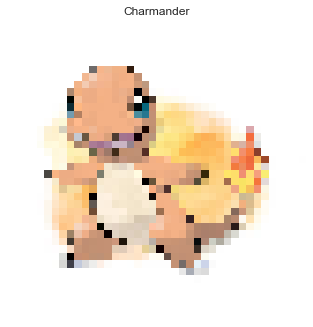

In [107]:
draw_image(X_data[0],Y_data[0])

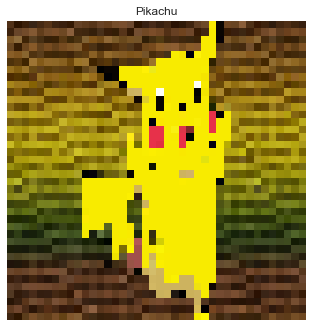

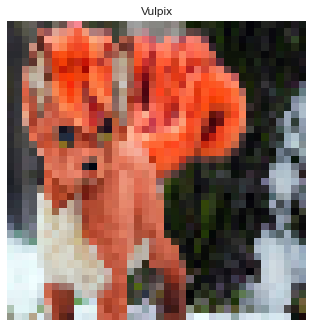

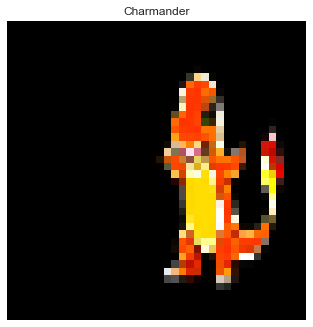

In [108]:
for i in range(1,4):
    draw_image(X_data[i],Y_data[i])

# 4. Create Training and Testing Data

In [109]:
split = int(X_data.shape[0]*0.8)
x_train = X_data[:split,:]
y_train = Y_data[:split]
x_test=X_data[split:,:]
y_test=Y_data[split:]

In [110]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(532, 40, 40, 3) (133, 40, 40, 3)
(532,) (133,)


# 5. Building Neural Network

In [111]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans        

In [112]:

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [113]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [114]:
model = NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features(40X40X3)

In [115]:
print(x_train.shape)

(532, 40, 40, 3)


In [123]:
x_train = x_train.reshape(x_train.shape[0],-1)
print(x_train.shape)

XTest = x_test.reshape(x_test.shape[0],-1)
print(XTest.shape)

(532, 4800)
(133, 4800)


In [124]:
l = train(x_train,y_train,model,500,0.0002)

ValueError: operands could not be broadcast together with shapes (532,5) (532,3) 